In [1]:
%matplotlib inline
import logging
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from nuwinter.neutrino import schedule_neutrino, parse_neutrino
from wintertoo.validate import validate_schedule_request
from winterapi import WinterAPI

In [2]:
logging.getLogger("nuwinter").setLevel("INFO")

In [3]:
winter = WinterAPI()

In [4]:
# Program details
program = "2024A001"

In [5]:
program_list = winter.get_programs()
print(f"Available programs: {program_list}")
assert program in program_list, f"program {program} not found! Add this program first."

Available programs: ['2023A000', '2023A001', '2023A002', '2023A004', '2023A012', '2023A999', '2024A000', '2024A001', '2024A006']


INFO:nuwinter.neutrino:Found GCN 35984 for IC240327B


{'node': {'id': 'Q2lyY3VsYXI6MzU5ODQ=', 'id_': '35984', 'received': '2024-03-27T18:11:03', 'subject': 'IceCube-240327B - IceCube observation of a high-energy neutrino candidate track-like event', 'evtidCircular': {'event': 'IC 240327B'}, 'cid': 35984, 'evtid': 200248, 'oidCircular': {'telescope': 'IceCube', 'detector': None, 'oidEvent': {'wavelength': None, 'messenger': 'ν'}}}}
[WinterRaDecToO(ra_deg=88.615, dec_deg=0.31000000000000005, use_field_grid=False, filters=['J'], target_priority=150.0, target_name='IC240327B_0', total_exposure_time=960.0, n_dither=8, n_repetitions=1, dither_distance=30.0, start_time_mjd=60397.096743151946, end_time_mjd=60398.096743151946, max_airmass=2.0, use_best_detector=False, single_exposure_time=120.0), WinterRaDecToO(ra_deg=89.615, dec_deg=0.31000000000000005, use_field_grid=False, filters=['J'], target_priority=150.0, target_name='IC240327B_0', total_exposure_time=960.0, n_dither=8, n_repetitions=1, dither_distance=30.0, start_time_mjd=60397.0967431519

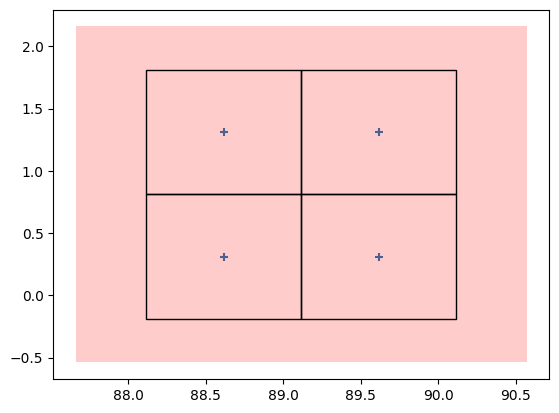

In [6]:
too_args = {
#     "t_exp": 600.0,
#     "n_dither": 5
    "filters": ["J"]
}

too_list = schedule_neutrino(
    "IC240327B", scale=1.0, mode="square", make_plot=True, too_args=too_args, nights=[0, 0, 1, 2],)
print(too_list)

In [7]:
local_schedule = winter.build_schedule_locally(
    program_name=program,
    data=too_list
)
local_schedule.sort_values(by=["filter", "validStart"], inplace=True)
local_schedule.reset_index(inplace=True)
local_schedule.drop(columns=["index"], inplace=True)
local_schedule["obsHistID"] = range(len(local_schedule))
local_schedule

,targName,raDeg,decDeg,fieldID,filter,visitExpTime,singleExpTime,priority,progPI,progName,progID,validStart,validStop,observed,maxAirmass,ditherNumber,ditherStepSize,bestDetector,obsHistID
0,IC240327B_0,88.615,0.31,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60397.096743,60398.096743,False,2.0,8,30.0,False,0
1,IC240327B_0,89.615,0.31,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60397.096743,60398.096743,False,2.0,8,30.0,False,1
2,IC240327B_0,88.615,1.31,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60397.096743,60398.096743,False,2.0,8,30.0,False,2
3,IC240327B_0,89.615,1.31,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60397.096743,60398.096743,False,2.0,8,30.0,False,3
4,IC240327B_1,88.615,0.31,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60397.096743,60398.096743,False,2.0,8,30.0,False,4
5,IC240327B_1,89.615,0.31,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60397.096743,60398.096743,False,2.0,8,30.0,False,5
6,IC240327B_1,88.615,1.31,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60397.096743,60398.096743,False,2.0,8,30.0,False,6
7,IC240327B_1,89.615,1.31,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60397.096743,60398.096743,False,2.0,8,30.0,False,7
8,IC240327B_2,88.615,0.31,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60398.096743,60399.096743,False,2.0,8,30.0,False,8
9,IC240327B_2,89.615,0.31,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60398.096743,60399.096743,False,2.0,8,30.0,False,9


In [10]:
api_res, api_schedule = winter.submit_too(
    program_name=program,
    data=too_list,
    submit_trigger=False
)
api_res

<Response [200]>

In [9]:
api_schedule

,targName,raDeg,decDeg,fieldID,filter,visitExpTime,singleExpTime,priority,progPI,progName,progID,validStart,validStop,observed,maxAirmass,ditherNumber,ditherStepSize,bestDetector,obsHistID
0,IC240327B_0,88.615,0.31,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60397.096743,60398.096743,False,2.0,8,30.0,False,0
1,IC240327B_0,89.615,0.31,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60397.096743,60398.096743,False,2.0,8,30.0,False,1
2,IC240327B_0,88.615,1.31,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60397.096743,60398.096743,False,2.0,8,30.0,False,2
3,IC240327B_0,89.615,1.31,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60397.096743,60398.096743,False,2.0,8,30.0,False,3
4,IC240327B_1,88.615,0.31,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60397.096743,60398.096743,False,2.0,8,30.0,False,4
5,IC240327B_1,89.615,0.31,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60397.096743,60398.096743,False,2.0,8,30.0,False,5
6,IC240327B_1,88.615,1.31,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60397.096743,60398.096743,False,2.0,8,30.0,False,6
7,IC240327B_1,89.615,1.31,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60397.096743,60398.096743,False,2.0,8,30.0,False,7
8,IC240327B_2,88.615,0.31,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60398.096743,60399.096743,False,2.0,8,30.0,False,8
9,IC240327B_2,89.615,0.31,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60398.096743,60399.096743,False,2.0,8,30.0,False,9


In [13]:
res, queue = winter.get_observatory_queue(program_name=program)
print(res.json()["msg"])
queue

Returning schedule summary for 2024A001


,prog_name,attempted_frac,too_schedule_name,target_names,n_entries,total_time_hours,window_start,window_end
3,2024A001,0.0,request_2024A001_2024_03_27_19_20_17,"[IC240327B_0, IC240327B_1, IC240327B_2, IC2403...",16,4.266667,2024-03-28 02:19:18.608,2024-03-31 02:19:18.608
